# Grafici Assorbanze.

Siccome la Fra è simpatica e vuole pure i grafici delle assorbanze e siccome questi grafici sono delle cagate da fare perchè non farli subito

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def absorbance_from_transmittance(x):
    return -np.log10(x)

names = ("lambda", "transmittance")

In [2]:
oro_vetro_vetro = pd.read_table("./data/Pre-21-04/oro_vetro_vetro_04_04_1.txt", skiprows=75, names=names)
oro_vetro_vetro.head()

,lambda,transmittance
0,900.0,0.5384
1,899.5,0.5309
2,899.0,0.5045
3,898.5,0.4920
4,898.0,0.7139


In [3]:
aria_aria = pd.read_table("./data/Pre-21-04/aria_aria_04_04_1.txt", skiprows=75, names=names)

oro_vetro_vetro["polished"] = oro_vetro_vetro["transmittance"] / aria_aria["transmittance"]

oro_vetro_vetro["absorbance"] = absorbance_from_transmittance(oro_vetro_vetro["polished"])

oro_vetro_vetro.head()

c:\Users\ginob\anaconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,lambda,transmittance,polished,absorbance
0,900.0,0.5384,0.493266,0.306919
1,899.5,0.5309,0.543009,0.265193
2,899.0,0.5045,0.515217,0.288010
3,898.5,0.4920,0.491116,0.308816
4,898.0,0.7139,0.731155,0.135990


Text(0, 0.5, 'absorbance')

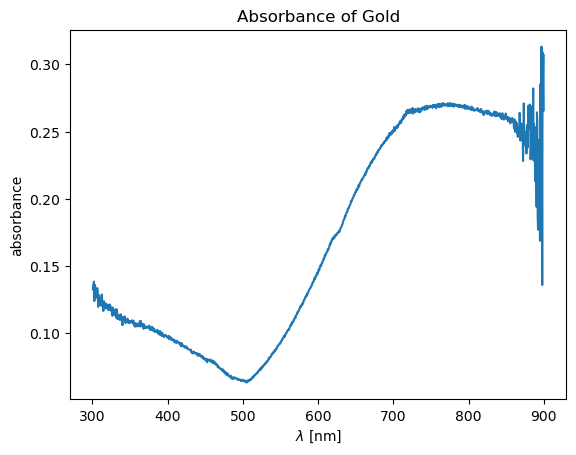

In [4]:
plt.plot("lambda", "absorbance", data = oro_vetro_vetro[oro_vetro_vetro["lambda"] > 300])
plt.title("Absorbance of Gold")
plt.xlabel(r"$\lambda$ [nm]")
plt.ylabel("absorbance")